# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

In [3]:
import pandas as pd  
import numpy as np

In [4]:
file1 = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv')
display(file1.head(5))

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [5]:
file1.columns

Index(['Customer', 'ST', 'GENDER', 'Education', 'Customer Lifetime Value',
       'Income', 'Monthly Premium Auto', 'Number of Open Complaints',
       'Policy Type', 'Vehicle Class', 'Total Claim Amount'],
      dtype='object')

In [6]:
#to change the name to lower case, you can use this, which is more simple than the below one:  data.rename(columns=str.lower, inplace=True)

In [7]:
# this code was lifted from L. 1.03 and adapted to update the column names accordingly
cols = []
for column in file1.columns:
    cols.append(column.lower())
cols
file1.columns = cols

# renaming columns
file1 = file1.rename(columns={'customer lifetime value':'customer_lifetime_value',
                            'monthly premium auto':'monthly_premium_auto', 
                            'number of open complaints':'no_of_open_complaints',
                            'policy type':'policy_type',
                            'vehicle class':'vehicle_class',
                            'total claim amount':'total_claim_amount',
                            'st':'state'})
file1.head()
#data.shape

file1

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,no_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [8]:
# first finding the variations for gender column
file1['gender'].unique()
file1['gender'].value_counts()

gender
F         457
M         413
Male       39
female     28
Femal      17
Name: count, dtype: int64

In [9]:
# Lifting this from L. 1.04 

# Define a function to clean the column
def clean(x):
    if x in ['M', 'MALE']:
        return 'Male'
    elif x in ['F', 'female','Femal']:
        return 'Female'
    else:
        pass

file1['gender'] = list(map(clean, file1['gender']))
file1['gender'].unique()  # To check the results again

array([None, 'Female', 'Male'], dtype=object)

In [10]:
# Checking if it's worked 
file1['gender'].unique()
file1['gender'].value_counts()

gender
Female    502
Male      413
Name: count, dtype: int64

In [11]:
# State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"
# First need to check the states
file1['state'].unique()
file1['state'].value_counts()

state
Oregon        320
California    211
Arizona       186
Cali          120
Nevada         98
Washington     81
WA             30
AZ             25
Name: count, dtype: int64

In [12]:
# Define a function to clean the column
def clean(x):
    if x in ['WA', 'Washington']:
        return 'Washington'
    elif x in ['California', 'Cali']:
        return 'California'
    elif x in ['Arizona', 'AZ']:
        return 'Arizona'
    elif x in ['Oregon']:
        return 'Oregon'
    elif x in ['Nevada']:
        return 'Nevada'    
    else:
        pass

file1['state'] = list(map(clean, file1['state']))
file1['state'].unique()  # To check the results again

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', None],
      dtype=object)

In [13]:
file1['state'].unique()
file1['state'].value_counts()

state
California    331
Oregon        320
Arizona       211
Washington    111
Nevada         98
Name: count, dtype: int64

In [14]:
#- *In education, "Bachelors" could be replaced by "Bachelor"*

file1['education'].unique()
file1['education'].value_counts()

education
Bachelor                324
College                 313
High School or Below    296
Master                   94
Doctor                   37
Bachelors                 7
Name: count, dtype: int64

In [15]:
file1['education'] = file1['education'].replace('Bachelors', 'Bachelor')
file1['education'].unique()
file1['education'].value_counts()

education
Bachelor                331
College                 313
High School or Below    296
Master                   94
Doctor                   37
Name: count, dtype: int64

In [16]:
# file1.education = np.where(data.education == 'Bachelors', 'Bachelor', whatever it is if it's not that in this point)

In [17]:
#- *In Customer Lifetime Value, delete the `%` character*
# I actually do this in step 4 below because this method doesn't work for the subsequent step of converting it into a numerical answer
#file1['customer_lifetime_value'] = file1['customer_lifetime_value'].astype(str).str.replace('%', '')

In [18]:
print(file1['customer_lifetime_value'])

0               NaN
1        697953.59%
2       1288743.17%
3        764586.18%
4        536307.65%
           ...     
4003            NaN
4004            NaN
4005            NaN
4006            NaN
4007            NaN
Name: customer_lifetime_value, Length: 4008, dtype: object


In [19]:
#- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*
file1['vehicle_class'] = file1['vehicle_class'].replace('Sports Car', 'Luxury')
file1['vehicle_class'] = file1['vehicle_class'].replace('Luxury SUV', 'Luxury')
file1['vehicle_class'] = file1['vehicle_class'].replace('Luxury Car', 'Luxury')

In [20]:
#checking it's worked 
file1['vehicle_class'].unique()
file1['vehicle_class'].value_counts()

vehicle_class
Four-Door Car    576
Two-Door Car     205
SUV              199
Luxury            91
Name: count, dtype: int64

## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [21]:
file1.dtypes

customer                    object
state                       object
gender                      object
education                   object
customer_lifetime_value     object
income                     float64
monthly_premium_auto       float64
no_of_open_complaints       object
policy_type                 object
vehicle_class               object
total_claim_amount         float64
dtype: object

In [22]:
# Convert to a numberic value using this code 
file1['customer_lifetime_value'] = pd.to_numeric(file1['customer_lifetime_value'].str.strip('%')).div(100)


In [23]:
file1.dtypes

customer                    object
state                       object
gender                      object
education                   object
customer_lifetime_value    float64
income                     float64
monthly_premium_auto       float64
no_of_open_complaints       object
policy_type                 object
vehicle_class               object
total_claim_amount         float64
dtype: object

In [24]:
# new data frame with split value columns
file1['no_of_open_complaints'] = file1['no_of_open_complaints'].str.split("/", n=-1, expand=False)

In [25]:
#Getting the middle value from the list
def extract_middle_value(x):
    if isinstance(x, list):
        return x[1]
    else:
        return None

file1['clean_complaints'] = file1['no_of_open_complaints'].apply(extract_middle_value)

In [26]:
# checking the new data structure 
file1['clean_complaints'].value_counts()

clean_complaints
0    830
1    138
2     50
3     34
4     13
5      6
Name: count, dtype: int64

In [27]:
# Display the result
display(file1.head(5))

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,no_of_open_complaints,policy_type,vehicle_class,total_claim_amount,clean_complaints
0,RB50392,Washington,None,Master,NaN,0.0,1000.0,"[1, 0, 00]",Personal Auto,Four-Door Car,2.704934,0
1,QZ44356,Arizona,Female,Bachelor,6979.5359,0.0,94.0,"[1, 0, 00]",Personal Auto,Four-Door Car,1131.464935,0
2,AI49188,Nevada,Female,Bachelor,12887.4317,48767.0,108.0,"[1, 0, 00]",Personal Auto,Two-Door Car,566.472247,0
3,WW63253,California,Male,Bachelor,7645.8618,0.0,106.0,"[1, 0, 00]",Corporate Auto,SUV,529.881344,0
4,GA49547,Washington,Male,High School or Below,5363.0765,36357.0,68.0,"[1, 0, 00]",Personal Auto,Four-Door Car,17.269323,0


## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers.

In [28]:
empty = file1.isnull().sum()
print(empty)

customer                   2937
state                      2937
gender                     3093
education                  2937
customer_lifetime_value    2940
income                     2937
monthly_premium_auto       2937
no_of_open_complaints      2937
policy_type                2937
vehicle_class              2937
total_claim_amount         2937
clean_complaints           2937
dtype: int64


In [29]:
file2 = file1.dropna()
display(file2)

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,no_of_open_complaints,policy_type,vehicle_class,total_claim_amount,clean_complaints
1,QZ44356,Arizona,Female,Bachelor,6979.5359,0.0,94.0,"[1, 0, 00]",Personal Auto,Four-Door Car,1131.464935,0
2,AI49188,Nevada,Female,Bachelor,12887.4317,48767.0,108.0,"[1, 0, 00]",Personal Auto,Two-Door Car,566.472247,0
3,WW63253,California,Male,Bachelor,7645.8618,0.0,106.0,"[1, 0, 00]",Corporate Auto,SUV,529.881344,0
4,GA49547,Washington,Male,High School or Below,5363.0765,36357.0,68.0,"[1, 0, 00]",Personal Auto,Four-Door Car,17.269323,0
5,OC83172,Oregon,Female,Bachelor,8256.2978,62902.0,69.0,"[1, 0, 00]",Personal Auto,Two-Door Car,159.383042,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,Male,Master,3059.5503,38644.0,78.0,"[1, 1, 00]",Personal Auto,Four-Door Car,361.455219,1
1067,VJ51327,California,Female,High School or Below,20314.9976,63209.0,102.0,"[1, 2, 00]",Personal Auto,SUV,207.320041,2
1068,GS98873,Arizona,Female,Bachelor,3239.1247,16061.0,88.0,"[1, 0, 00]",Personal Auto,Four-Door Car,633.600000,0
1069,CW49887,California,Female,Master,4626.8011,79487.0,114.0,"[1, 0, 00]",Special Auto,SUV,547.200000,0


In [30]:
empty2 = file2.isnull().sum()
print(empty2)

customer                   0
state                      0
gender                     0
education                  0
customer_lifetime_value    0
income                     0
monthly_premium_auto       0
no_of_open_complaints      0
policy_type                0
vehicle_class              0
total_claim_amount         0
clean_complaints           0
dtype: int64


## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [31]:
#lifted from l1.03 
clean3 = file2.copy()
#clean3 = clean3.drop_duplicates()  - this line doesn't work and i won't convert the table, so just going to ignore it. 
print(clean3.shape)

(913, 12)


In [32]:
display(clean3)

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,no_of_open_complaints,policy_type,vehicle_class,total_claim_amount,clean_complaints
1,QZ44356,Arizona,Female,Bachelor,6979.5359,0.0,94.0,"[1, 0, 00]",Personal Auto,Four-Door Car,1131.464935,0
2,AI49188,Nevada,Female,Bachelor,12887.4317,48767.0,108.0,"[1, 0, 00]",Personal Auto,Two-Door Car,566.472247,0
3,WW63253,California,Male,Bachelor,7645.8618,0.0,106.0,"[1, 0, 00]",Corporate Auto,SUV,529.881344,0
4,GA49547,Washington,Male,High School or Below,5363.0765,36357.0,68.0,"[1, 0, 00]",Personal Auto,Four-Door Car,17.269323,0
5,OC83172,Oregon,Female,Bachelor,8256.2978,62902.0,69.0,"[1, 0, 00]",Personal Auto,Two-Door Car,159.383042,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,Male,Master,3059.5503,38644.0,78.0,"[1, 1, 00]",Personal Auto,Four-Door Car,361.455219,1
1067,VJ51327,California,Female,High School or Below,20314.9976,63209.0,102.0,"[1, 2, 00]",Personal Auto,SUV,207.320041,2
1068,GS98873,Arizona,Female,Bachelor,3239.1247,16061.0,88.0,"[1, 0, 00]",Personal Auto,Four-Door Car,633.600000,0
1069,CW49887,California,Female,Master,4626.8011,79487.0,114.0,"[1, 0, 00]",Special Auto,SUV,547.200000,0


In [33]:
clean3.to_csv('clean3.csv', index=False)

# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [34]:
# Your code here

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [35]:
# Your code here

# Lab | Customer Analysis Round 3

- Show DataFrame info.
- Describe DataFrame.
- Show a plot of the Gender breakdown.
- Show a plot of Income by State.
- Show a plot of the Policy Type by the Total Claim Amount.
- Show a plot of the Education by Vehicle Class.
- What insights can you establish from these plots?
- What other plots do you feel would be beneficial?

In [36]:
clean3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 913 entries, 1 to 1070
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer                 913 non-null    object 
 1   state                    913 non-null    object 
 2   gender                   913 non-null    object 
 3   education                913 non-null    object 
 4   customer_lifetime_value  913 non-null    float64
 5   income                   913 non-null    float64
 6   monthly_premium_auto     913 non-null    float64
 7   no_of_open_complaints    913 non-null    object 
 8   policy_type              913 non-null    object 
 9   vehicle_class            913 non-null    object 
 10  total_claim_amount       913 non-null    float64
 11  clean_complaints         913 non-null    object 
dtypes: float64(4), object(8)
memory usage: 92.7+ KB


In [37]:
clean3.describe()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
count,913.000000,913.000000,913.000000,913.000000
mean,7876.459338,39683.856517,209.290252,399.270604
std,6193.145121,30635.441545,1733.531434,297.081611
min,2004.350700,0.000000,61.000000,0.382107
25%,4016.542000,14290.000000,68.000000,185.355353
50%,5780.182200,36650.000000,82.000000,350.400000
75%,9027.867200,64801.000000,109.000000,529.881344
max,44795.469400,99934.000000,35354.000000,2893.239678


In [38]:
#!pip3 install seaborn if you need to
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

<Axes: xlabel='gender', ylabel='count'>

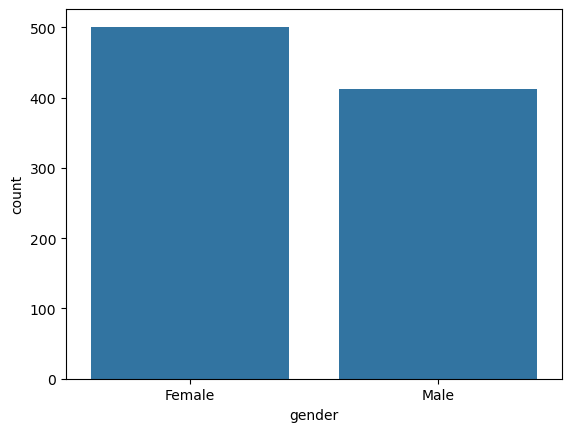

In [39]:
#- Show a plot of the Gender breakdown.
sns.countplot(x='gender', data=clean3)

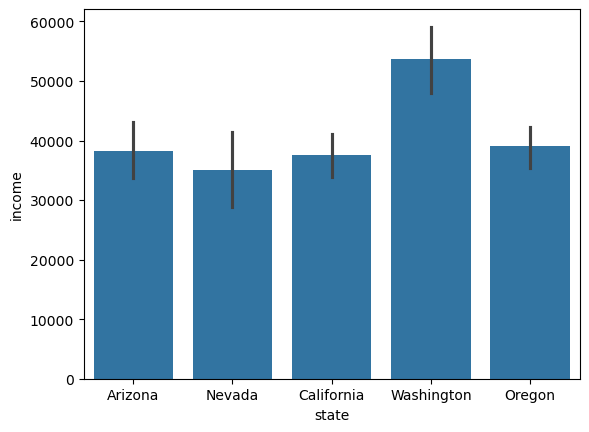

In [40]:
#- Show a plot of income by state
sns.barplot(x = 'state',y='income', data=clean3)
plt.show()

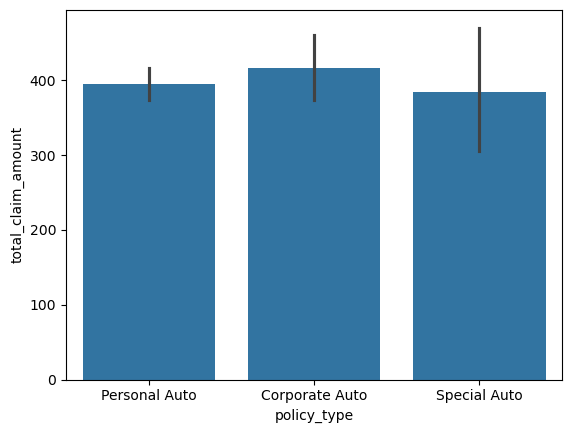

In [41]:
#- Show a plot of the Policy Type by the Total Claim Amount.
sns.barplot(x = 'policy_type',y='total_claim_amount', data=clean3)
plt.show()

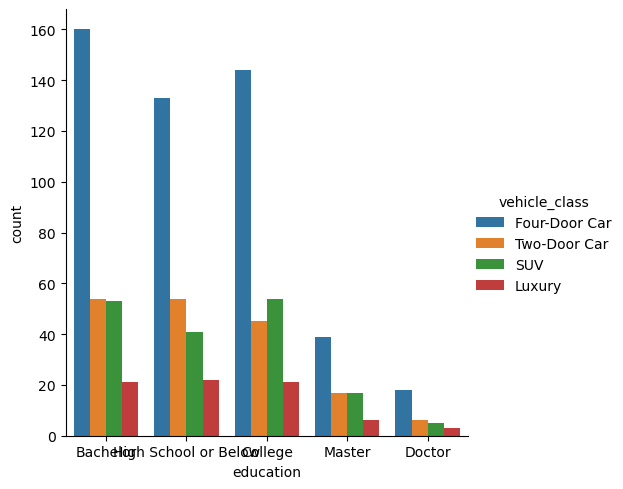

In [42]:
#- Show a plot of the Education by Vehicle Class.
#sns.scatterplot(x=clean3['education'], y=clean3['vehicle_class'])
#sns.barplot(x = 'education',y='vehicle_class', data=clean3)
#sns.boxplot(x = 'education',y='vehicle_class', data=clean3)
#sns.histplot(clean3['education'], bins=50)
sns.catplot(x="education", hue="vehicle_class", kind="count",data=clean3)
# Assume a correlation matrix would be useful but non numeric data
#doing an additional analysis by creating a cohort and seeing what percentage of the cohort has a vehicle type would be better, rather than raw numbers here. 
plt.show()

**What insights can you establish from these plots?**
- More females than males in data set (and percentage would be easy to work out)
- In the data set, people in Washington have the highest income and Nevada the lowest
- Coporoate Auto has the highest claim amount but the claims are broadly similar, differing by less than 10% of each other

**What other plots do you feel would be beneficial?**
- Vehicle class and claim amount likely to have a strong correlation
- Gender claim and income, to see if a gender has a higher claim bias or if it's more income related
- Lifetime value based on multiple data points; gender, state, policy type. This is very high value data, effectively ROI.


-------------------

# Lab | Customer Analysis Round 4


Complete the following task:
- Check the data types of the columns.
- Get the numeric data into a dataframe called numerical and categorical columns in a dataframe called categorical. (You can use np.number and object to select the numerical data types and categorical data types respectively)
**Now we will try to check the normality of the numerical variables visually** 
- Use seaborn library to construct distribution plots for the numerical variables
- Use Matplotlib to construct histograms
- Do the distributions for different numerical variables look like a normal distribution?
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
- Drop one of the two features that show a high correlation between them (greater than 0.9).
- Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [43]:
clean3.dtypes

customer                    object
state                       object
gender                      object
education                   object
customer_lifetime_value    float64
income                     float64
monthly_premium_auto       float64
no_of_open_complaints       object
policy_type                 object
vehicle_class               object
total_claim_amount         float64
clean_complaints            object
dtype: object

In [44]:
# I'm doing this step here because I forgot to do it earlier 
clean3['clean_complaints'] = pd.to_numeric(clean3['clean_complaints'])
clean3 = clean3.drop(['no_of_open_complaints'], axis=1) 

In [46]:
#Creating the numerical dataframe
numerical = clean3[['customer_lifetime_value','income','monthly_premium_auto','total_claim_amount','clean_complaints']].copy()
numerical
#or display(numerical.head(5))

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount,clean_complaints
1,6979.5359,0.0,94.0,1131.464935,0
2,12887.4317,48767.0,108.0,566.472247,0
3,7645.8618,0.0,106.0,529.881344,0
4,5363.0765,36357.0,68.0,17.269323,0
5,8256.2978,62902.0,69.0,159.383042,0
...,...,...,...,...,...
1066,3059.5503,38644.0,78.0,361.455219,1
1067,20314.9976,63209.0,102.0,207.320041,2
1068,3239.1247,16061.0,88.0,633.600000,0
1069,4626.8011,79487.0,114.0,547.200000,0


In [47]:
#Creating the categorical dataframe
categorical = clean3[['customer','state', 'gender','education', 'policy_type','vehicle_class']].copy()  
categorical 
#or display(categorical.head(5))

,customer,state,gender,education,policy_type,vehicle_class
1,QZ44356,Arizona,Female,Bachelor,Personal Auto,Four-Door Car
2,AI49188,Nevada,Female,Bachelor,Personal Auto,Two-Door Car
3,WW63253,California,Male,Bachelor,Corporate Auto,SUV
4,GA49547,Washington,Male,High School or Below,Personal Auto,Four-Door Car
5,OC83172,Oregon,Female,Bachelor,Personal Auto,Two-Door Car
...,...,...,...,...,...,...
1066,TM65736,Oregon,Male,Master,Personal Auto,Four-Door Car
1067,VJ51327,California,Female,High School or Below,Personal Auto,SUV
1068,GS98873,Arizona,Female,Bachelor,Personal Auto,Four-Door Car
1069,CW49887,California,Female,Master,Special Auto,SUV


In [48]:
# You could have done this, it would have been easier. Read this 
nums = clean3.select_dtypes(include = np.number)
cats = clean3.select_dtypes(include = object)

- Use seaborn library to construct distribution plots for the numerical variables
- Use Matplotlib to construct histograms

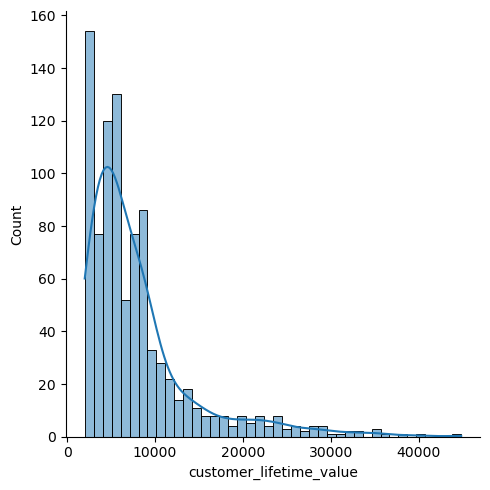

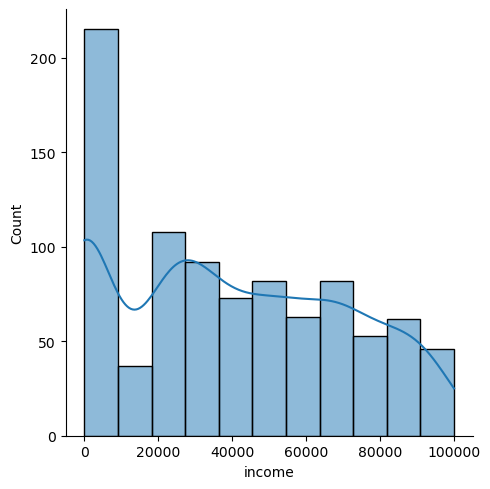

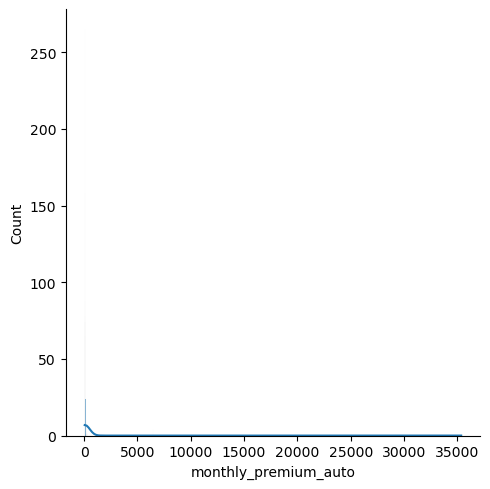

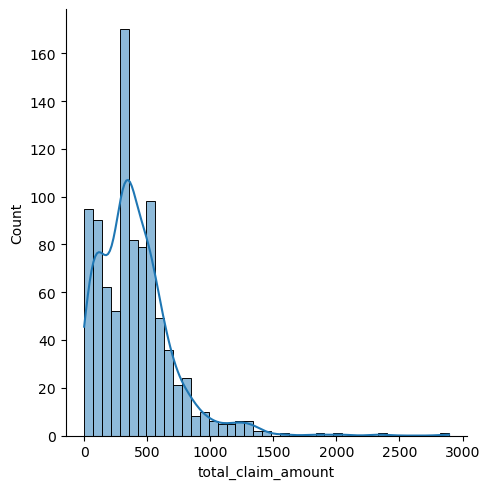

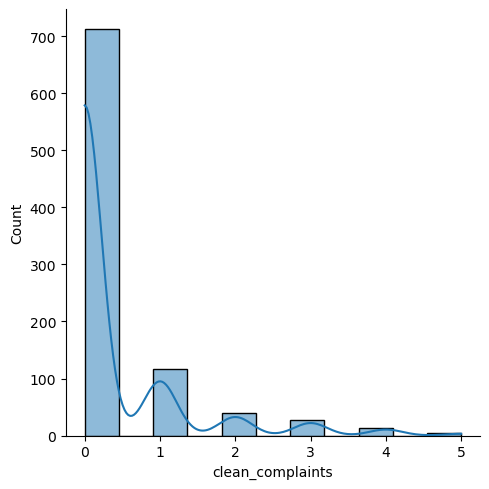

In [49]:
for column in nums.columns:
    sns.displot(nums[column],kde=True)
    plt.show()

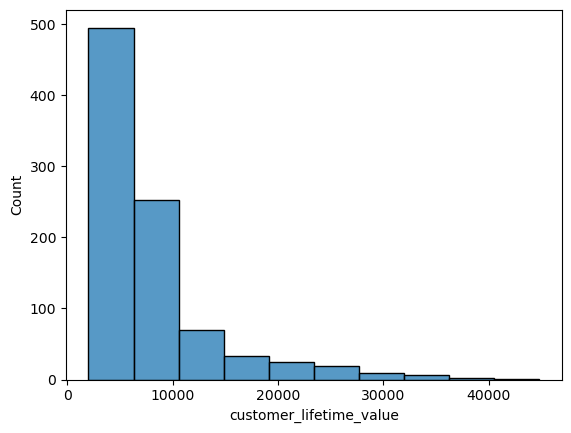

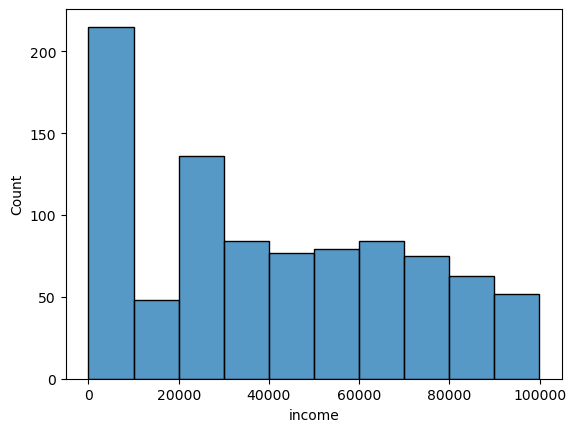

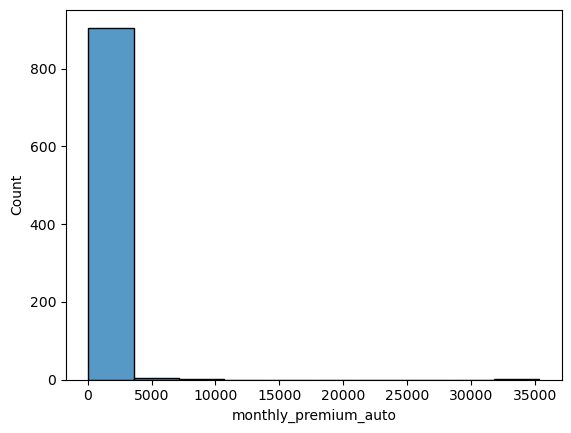

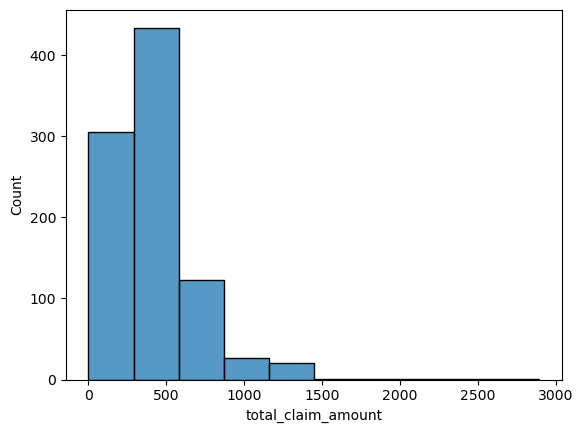

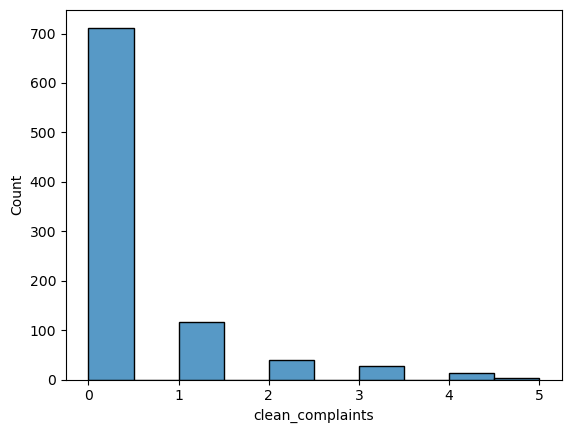

In [50]:
for column in nums.columns:
    sns.histplot(nums[column], bins=10)
    plt.show()

**Do the distributions for different numerical variables look like a normal distribution?**
- Mostly yes, except for monthly premium auto. There it has a really long tail that we should likely remove - most entries condensed at start.

- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

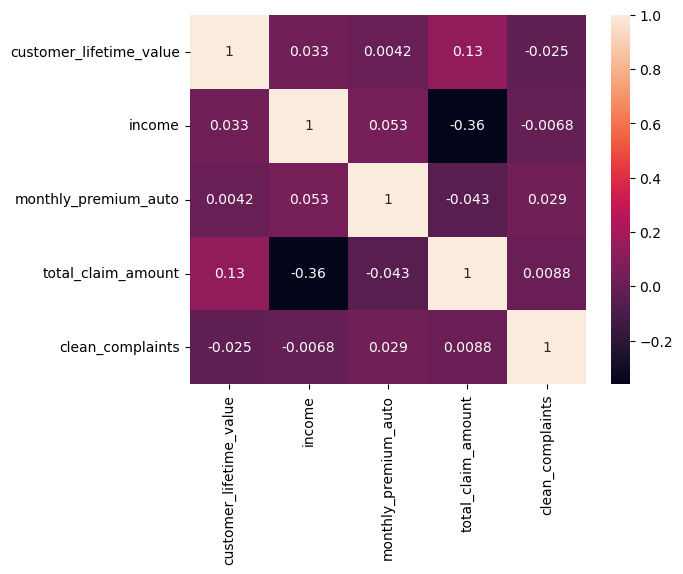

In [51]:
correlations_matrix = nums.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

Drop one of the two features that show a high correlation between them (greater than 0.9).
Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features
- I don't have a high correlation between any of them

# Lab | Customer Analysis Round 4

- X-y split. Remember that at this time you need the complete dataset, both numerical and categorical in the X features.
- X split into X_numerical and X_categorical
- Scaling (X_numerical).

In [60]:
y = clean3['total_claim_amount'] #lower case y 
X = clean3.drop(['total_claim_amount'], axis=1)


In [61]:
X_nums = X.select_dtypes(include = np.number)
X_cats = X.select_dtypes(include = object)

In [58]:
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler

In [59]:
transformer = MinMaxScaler().fit(X_nums)
x_normalized = transformer.transform(X_nums)
print(x_normalized.shape)
x_normalized
pd.DataFrame(x_normalized, columns=X_nums.columns)

(913, 4)


,customer_lifetime_value,income,monthly_premium_auto,clean_complaints
0,0.116267,0.000000,0.000935,0.0
1,0.254330,0.487992,0.001332,0.0
2,0.131838,0.000000,0.001275,0.0
3,0.078491,0.363810,0.000198,0.0
4,0.146104,0.629435,0.000227,0.0
...,...,...,...,...
908,0.024659,0.386695,0.000482,0.2
909,0.427908,0.632507,0.001162,0.4
910,0.028856,0.160716,0.000765,0.0
911,0.061285,0.795395,0.001502,0.0
